In [1]:
import pandas as pd
import numpy as np
from sklearn import tree

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(rc={'figure.figsize': (12, 8)})

In [3]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display 

from IPython.display import HTML
style = "<style>{width:50% !important; height:10% !important;}</style>"
HTML(style)

In [4]:
titanic_data = pd.read_csv('C:/work/Datasets/Titanic/train.csv')

In [5]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_data.shape

(891, 12)

In [7]:
titanic_data.size

10692

In [8]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
# проверка на пустые значения

titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# доля пропусков в данных

round(titanic_data.isna().mean() * 100, 2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [11]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)

In [12]:
# кодировка номинативных переменных

X = pd.get_dummies(X)

In [13]:
# замена пропущенных значений в столбце Age медианным значением

X = X.fillna({'Age': X.Age.median()})

In [14]:
y = titanic_data.Survived

In [15]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [16]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [17]:
clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

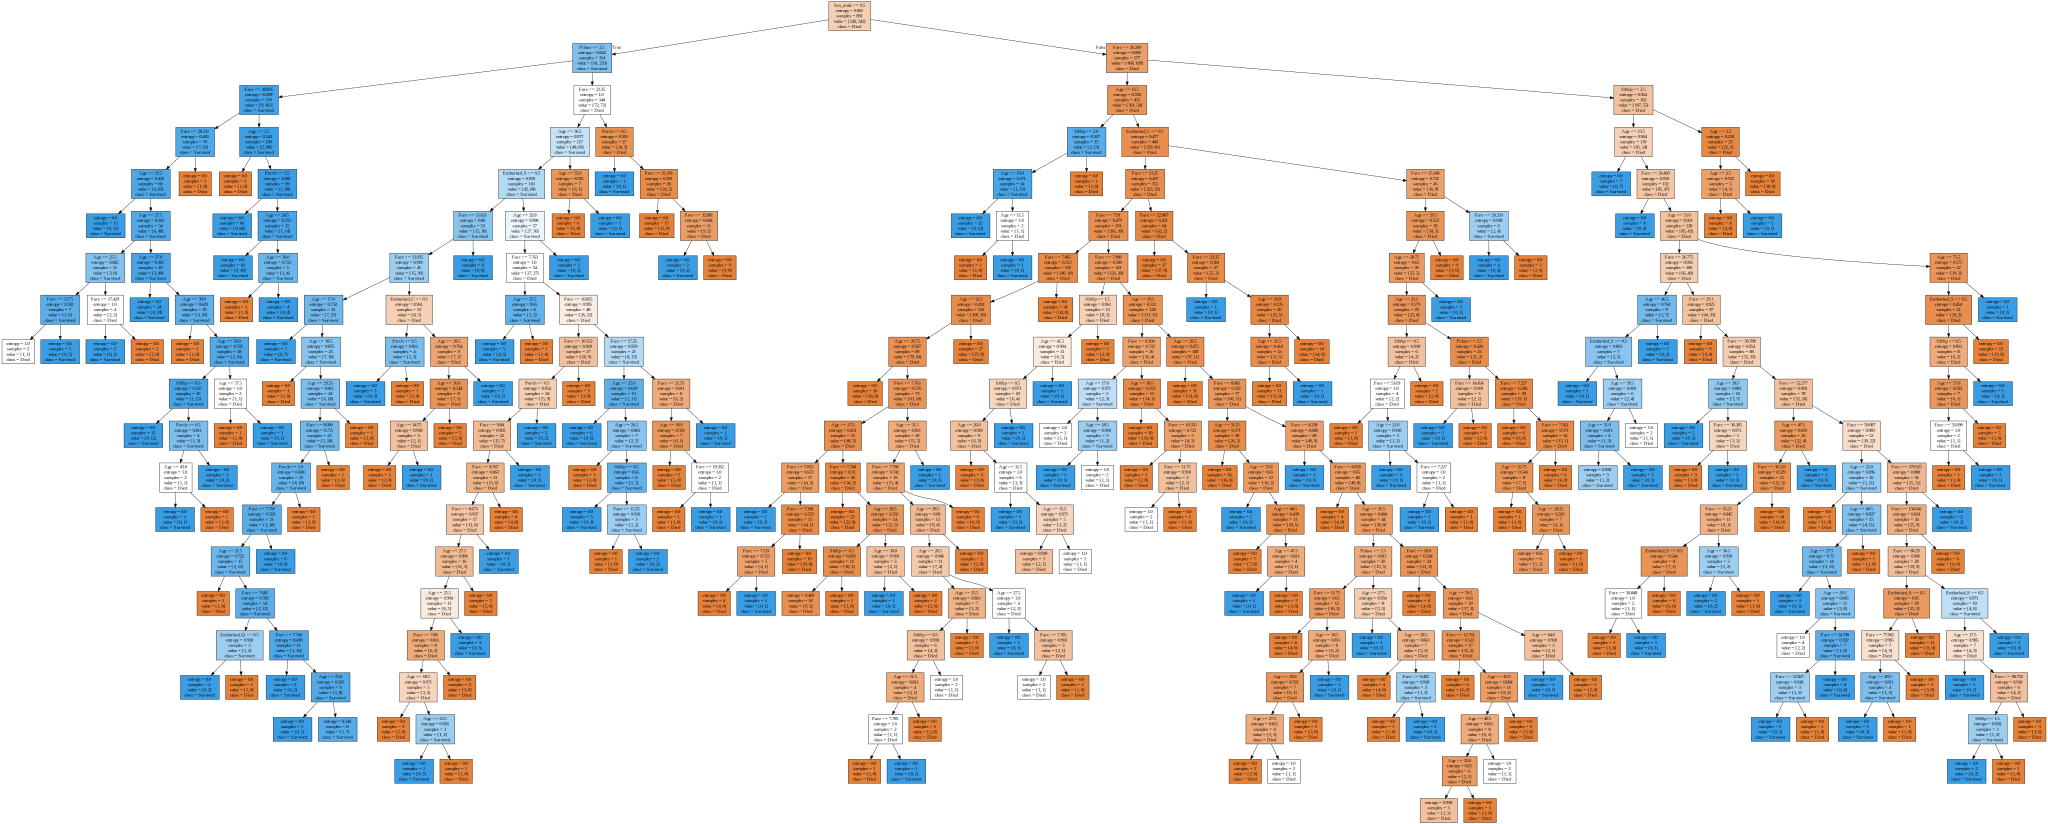

In [18]:
# дерево графически

graph = Source(tree.export_graphviz(clf, out_file=None,
                                    feature_names=list(X), 
                                    class_names=['Died', 'Survived'],
                                    filled=True))

display(SVG(graph.pipe(format='svg')))

Получился оверфитинг - переобучение модели: вместо общей закономерности модель пытается безошибочно классифицировать каждое наблюдение в выборке. 

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [21]:
# метод score предсказывает количество правильных ответов

clf.score(X, y)

0.9797979797979798

In [22]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [23]:
clf.score(X_train, y_train)

0.9798657718120806

In [24]:
clf.score(X_test, y_test)

0.7728813559322034

In [25]:
# ограничение глубины дерева

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [26]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [27]:
clf.score(X_train, y_train)

0.8238255033557047

In [28]:
clf.score(X_test, y_test)

0.8203389830508474

Тренировочные данные - хуже, но тестовые - лучше.


In [29]:
# кроссвалидация

from sklearn.model_selection import cross_val_score

In [30]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [31]:
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.8070728291316527

In [32]:
max_depth_values = range(1,120)

In [33]:
scores_data = pd.DataFrame()

for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf,
                                           X_train,
                                           y_train,
                                           cv=5).mean()
    
    temp_score_data = pd.DataFrame(
        {'max_depth': [max_depth],
         'train_score': [train_score],
         'test_score': [test_score],
         'cross_val_score': [mean_cross_val_score]})
    
    scores_data = scores_data.append(temp_score_data)

In [34]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.806780,0.798711


In [35]:
# разворачиваем датафрейм в плоский формат

scores_data_long = pd.melt(scores_data, id_vars='max_depth', value_vars=['train_score', 'test_score', 'cross_val_score'],
                          var_name='sep_type', value_name='score')

In [36]:
scores_data_long.head()

,max_depth,sep_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


In [37]:
scores_data_long[scores_data_long.sep_type == 'cross_val_score'].sort_values('score', ascending=False).head()

,max_depth,sep_type,score
245,8,cross_val_score,0.805406
243,6,cross_val_score,0.803754
248,11,cross_val_score,0.803711
242,5,cross_val_score,0.798711
244,7,cross_val_score,0.798697


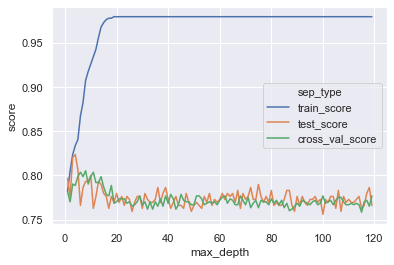

In [38]:
sns.lineplot(x='max_depth', y='score', hue='sep_type', data=scores_data_long)

In [39]:
# проверяем на тестовых данных

best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)

best_clf.fit(X_train, y_train)
best_clf.score(X_test, y_test)

0.7932203389830509

### 2.6 Подбор параметров и ROC and Roll ###

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
clf = tree.DecisionTreeClassifier()
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [42]:
parametrs = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 30)}

In [43]:
grid_search_cv_clf = GridSearchCV(clf, parametrs, cv=5)

In [44]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [45]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 11}

In [46]:
best_clf = grid_search_cv_clf.best_estimator_

In [47]:
best_clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=11, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [48]:
best_clf.score(X_test, y_test)

0.7694915254237288

In [49]:
from sklearn.metrics import precision_score, recall_score

In [50]:
y_pred = best_clf.predict(X_test)

In [51]:
precision_score(y_test, y_pred)

0.7407407407407407

In [52]:
recall_score(y_test, y_pred)

0.6666666666666666

In [53]:
y_predicted_prob = best_clf.predict_proba(X_test)

In [54]:
y_predicted_prob

array([[0.42857143, 0.57142857],
       [0.5       , 0.5       ],
       [0.86206897, 0.13793103],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.14285714, 0.85714286],
       [0.86206897, 0.13793103],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.91666667, 0.08333333],
       [0.72727273, 0.27272727],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.71428571, 0.28571429],
       [0.96511628, 0.03488372],
       [1.        , 0.        ],
       [0.96511628, 0.03488372],
       [0.5       , 0.5       ],
       [0.71428571, 0.28571429],
       [0.86206897, 0.13793103],
       [0.96511628, 0.03488372],
       [1.        , 0.        ],
       [0.5       , 0.5       ],
       [0.5       , 0.5       ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.

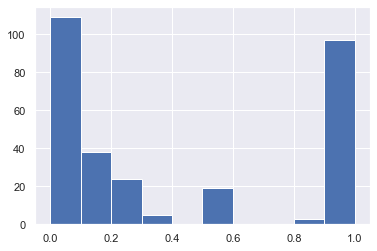

In [55]:
pd.Series(y_predicted_prob[:, 1]).hist()

In [56]:
# высокий precision, низкий recall

y_pred = np.where(y_predicted_prob[:, 1] > 0.8, 1, 0)

In [57]:
precision_score(y_test, y_pred)

0.78

In [58]:
recall_score(y_test, y_pred)

0.65

In [59]:
# низкий precision, высокий recall

y_pred = np.where(y_predicted_prob[:, 1] > 0.2, 1, 0)

In [60]:
precision_score(y_test, y_pred)

0.6756756756756757

In [61]:
recall_score(y_test, y_pred)

0.8333333333333334

In [62]:
# уникальные значения

pd.Series(y_predicted_prob[:, 1]).unique()

array([0.57142857, 0.5       , 0.13793103, 1.        , 0.        ,
       0.85714286, 0.08333333, 0.27272727, 0.28571429, 0.03488372,
       0.22222222, 0.1627907 , 0.33333333, 0.6       ])

**ROG-кривая**

In [63]:
precision_score(y_test, y_pred)

0.6756756756756757

In [64]:
recall_score(y_test, y_pred)

0.8333333333333334

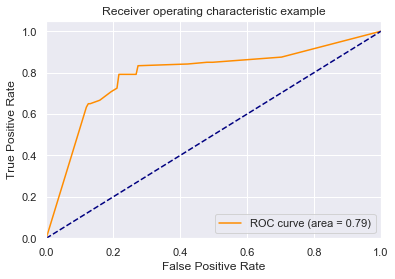

In [65]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# дерево графически

graph = Source(tree.export_graphviz(clf, out_file=None,
                                    feature_names=list(X), 
                                    class_names=['Died', 'Survived'],
                                    filled=True))

display(SVG(graph.pipe(format='svg')))